**## AIDI 1100: INTRODUCTION TO AI DEVELOPMENT**

**Final Project**

**Group 8**

Submitted By: -

Mahesh Sama

Rakesh Kasaragadda

Rodrigo Rangel-Alvarado

Saikrishna Mudaliar

Sarath Raju







## **Section 1: *Web Scraping PR Newswire***

**Objective:**

*   Collect latest automotive-related news headlines from PR Newswire to identify potential stock mentions.

**Method:**

*   Use Python's requests and BeautifulSoup libraries to scrape news listing pages.

*   Extract headlines within h3 tags from the first 25 pages.
*   Store all extracted headlines in a CSV file (news.csv) for further analysis.

**Outcome:**


*   A clean dataset (news.csv) containing headlines from the latest 25 pages of PR Newswire, ready for stock symbol analysis in the next steps.






In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

# File to store results
csv_file = open('news.csv', mode='w', newline='', encoding='utf-8')
csv_writer = csv.writer(csv_file)

# Write header row
csv_writer.writerow(['Title'])

# Base URL
base_url = 'https://www.prnewswire.com/news-releases/news-releases-list/'

# Number of pages to scrape
num_pages = 25

for page in range(1, num_pages + 1):
    url = base_url if page == 1 else f"{base_url}?page={page}"
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Failed to fetch page {page}")
        continue

    # Parse the HTML
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find and save article titles
    for headline in soup.find_all('h3'):
      title = headline.text.strip()

      # Write to CSV
      csv_writer.writerow([title])

# Close the file when done
csv_file.close()
print("\n Data saved to news.csv")


 Data saved to news.csv


## **Section 2:  *Stock Symbol Frequency Analysis***

**Objective:**

*   Scan the scraped news headlines (news.csv) to count mentions of popular auto manufacturer stock symbols.

**Method:**


*   Define a list of automotive stock symbols of interest.
*   Read the news.csv file and process each headline.
*   Perform a case-insensitive count of how many times each stock symbol appears.
*   Print out the results to identify which companies are most frequently mentioned in the news.

**Outcome:**


*   A frequency count of each stock symbol across the news headlines, helping us shortlist stocks for further market analysis.







In [ ]:
import csv
from collections import defaultdict

#List of AutoManufacturer stocks
stocks =["AIEV", "AYRO", "CENN", "CJET", "CYD", "DMN", "ECDA", "EVTV", "FFAI", "FLYE", "GGR", "GM",
        "HMC", "LCID", "LOBO", "LOT", "LVWR", "MULN", "NIO", "NIU", "NWTN", "PEV", "PSNY", "PSNYW",
        "RACE", "RIVN", "STLA", "TSLA", "VFS", "VLCN", "WKHS", "XPEV", "ZAPP", "ZK"]

# Dictionary to hold counts
string_counts = defaultdict(int)

# Path to CSV file
csv_file_path = 'news.csv'

# Read the CSV and count occurrences
with open(csv_file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        for cell in row:
            cell_lower = cell.lower()  # Make search case-insensitive
            for stock in stocks:
                string_counts[stock] += cell_lower.count(stock.lower())

# Display the results
for string, count in string_counts.items():
    print(f"'{string}' appears {count} times in the CSV file.")

'AIEV' appears 0 times in the CSV file.
'AYRO' appears 0 times in the CSV file.
'CENN' appears 0 times in the CSV file.
'CJET' appears 0 times in the CSV file.
'CYD' appears 0 times in the CSV file.
'DMN' appears 0 times in the CSV file.
'ECDA' appears 0 times in the CSV file.
'EVTV' appears 0 times in the CSV file.
'FFAI' appears 1 times in the CSV file.
'FLYE' appears 0 times in the CSV file.
'GGR' appears 0 times in the CSV file.
'GM' appears 3 times in the CSV file.
'HMC' appears 0 times in the CSV file.
'LCID' appears 0 times in the CSV file.
'LOBO' appears 0 times in the CSV file.
'LOT' appears 5 times in the CSV file.
'LVWR' appears 0 times in the CSV file.
'MULN' appears 3 times in the CSV file.
'NIO' appears 3 times in the CSV file.
'NIU' appears 1 times in the CSV file.
'NWTN' appears 0 times in the CSV file.
'PEV' appears 0 times in the CSV file.
'PSNY' appears 0 times in the CSV file.
'PSNYW' appears 0 times in the CSV file.
'RACE' appears 1 times in the CSV file.
'RIVN' ap

## **Section 3a: *Define Selected Stocks and Exchanges***

**Objective:**

*   Shortlist specific stock symbols for detailed analysis based on news frequency and industry relevance.

**Method:**

*   Select 3 automotive stocks from the previous step:
    
    *   GM (NYSE): General Motors
    *   MULN (NASDAQ): Mullen Automotive
    *   NIO (NYSE): NIO Inc.

*   Store the stock symbols along with their respective stock exchanges in a Python dictionary for easy reference in further steps.

**Outcome:**


*   A prepared dictionary containing the selected stock symbols and their corresponding exchanges, which will be used to fetch stock price and volume data.


















In [ ]:
#Define selected stock symbols and their exchanges

stocks = {
    "GM": "NYSE",      # General Motors
    "MULN": "NASDAQ",  # Mullen Automotive
    "NIO": "NYSE"      # NIO Inc.
}


## **Section 3b: *Retrieve Stock Price and Volume Data***

**Objective:**

*   Fetch historical stock price and volume data for the selected 3 stocks from Yahoo Finance.

**Method:**

*   Use Python's yfinance library to pull historical market data.
*   Retrieve the last 30 trading days of data to ensure recent and relevant analysis

For each stock:

*   Fetch historical price and volume.
*   Add symbol and exchange information to the dataset for clarity.
*   Combine data for all selected stocks into a single DataFrame.
*   Export the combined data to selected_stocks_data.csv for reference and future steps.

**Outcome:**

*   Successfully collected and saved the last 30 trading days of stock prices and volumes for GM, MULN, and NIO.





In [ ]:
# Retrieve stock price and volume data using Yahoo Finance API

import yfinance as yf
import pandas as pd

# Prepare an empty list to store all stock data
all_data = []

for symbol, exchange in stocks.items():
    stock = yf.Ticker(symbol)
    # Fetch historical data (get more days to ensure we get 30 trading days)
    hist = stock.history(period="60d").tail(30)  # Ensure we only keep last 30 trading days
    hist.reset_index(inplace=True)
    hist['Symbol'] = symbol
    hist['Exchange'] = exchange
    all_data.append(hist)

# Combine data for all selected stocks
all_data = pd.concat(all_data)

# Save combined data to CSV for record
all_data.to_csv("selected_stocks_data.csv", index=False)
print("Data saved to selected_stocks_data.csv")


Data saved to selected_stocks_data.csv


## **Section 4a: *Visualize Trading Volume (Time-Series Plot)***

**Objective:**

*   Create a detailed and professional line graph to visualize the daily trading volume over the last 30 trading days for the selected stocks.

**Method:**

*   For each selected stock (GM, MULN, NIO):
    
    *   Plot the trading volume against dates.
    *   Use markers ('o') for each point to make the graph visually appealing.
    *   Add annotations at start, middle, and end points of the time series to highlight key volume figures, displayed in millions for easy understanding.

*   Improve readability by:

    *   Formatting Y-axis ticks to show values in millions (M).
    *   Adding grid lines, rotated X-axis labels, and a legend for clear identification of each stock and its exchange.
    *   Use plt.tight_layout() to ensure all labels are well placed and the chart is neat.

**Outcome:**

*   Successfully generated a clear, annotated graph displaying the trading volumes of GM, MULN, and NIO over the last 30 trading days, helping visualize volume trends at a glance.

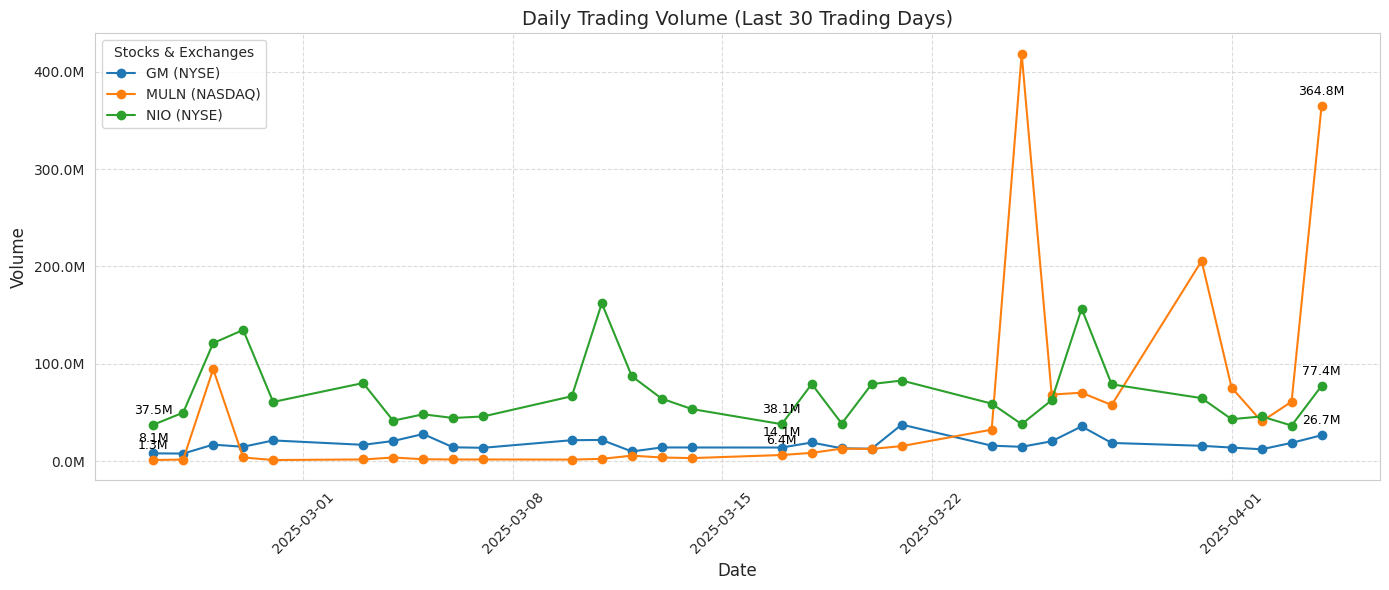

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the figure size for better visibility
plt.figure(figsize=(14, 6))

# Loop through each stock symbol
for symbol in stocks:
    # Filter the dataset for the current stock symbol
    subset = all_data[all_data['Symbol'] == symbol]

    # Plot the Volume data with markers for each point
    plt.plot(subset['Date'], subset['Volume'], label=f"{symbol} ({stocks[symbol]})", marker='o')

    # Identify indices for start, middle, and end positions in the data
    indices = [0, len(subset) // 2, len(subset) - 1]

    # Add annotations to show the volume at start, middle, and end points
    for i in indices:
        plt.annotate(
            f'{subset["Volume"].iloc[i]/1e6:.1f}M',                    # Format volume in millions with 1 decimal
            (subset['Date'].iloc[i], subset['Volume'].iloc[i]),        # Position of the annotation
            textcoords="offset points",                                # Offset the text to avoid overlap
            xytext=(0, 8),                                             # Offset by 8 points vertically
            ha='center',                                               # Horizontal alignment center
            fontsize=9,                                                # Font size of annotation
            color='black'                                              # Annotation color
        )

# Set the title of the graph
plt.title('Daily Trading Volume (Last 30 Trading Days)', fontsize=14)

# Set the x-axis label
plt.xlabel('Date', fontsize=12)

# Set the y-axis label
plt.ylabel('Volume', fontsize=12)

# Format y-axis ticks to show values in millions (e.g., 100M)
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x * 1e-6:.1f}M'))

# Add a legend with a title to distinguish between stocks
plt.legend(title='Stocks & Exchanges')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid lines to the plot for better visual reference
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cut-off
plt.tight_layout()

# Display the plot
plt.show()


## **Section 4b: *Visualize Daily Closing Price (Time-Series Plot)***

**Objective:**

*   Plot a time-series graph to visually compare the closing prices of our selected stocks (GM, MULN, NIO) over the past 30 trading days.

**Method:**

*   For each stock:

   *   Plot the daily closing price with markers to highlight individual data points.

   *   Add annotations for the first, middle, and last closing prices to make important values stand out.

*   Enhance the visualization:
    *   Add descriptive title, axis labels, and a legend indicating stock symbol and exchange.
    *   Rotate date labels on the X-axis for clarity.
    *   Include grid lines to improve readability.
    *   Use tight_layout() to ensure the layout is clean and professional.

**Outcome:**

*   Successfully created an informative graph displaying the daily closing price trends for each stock, making it easy to compare their short-term performance at a glance.


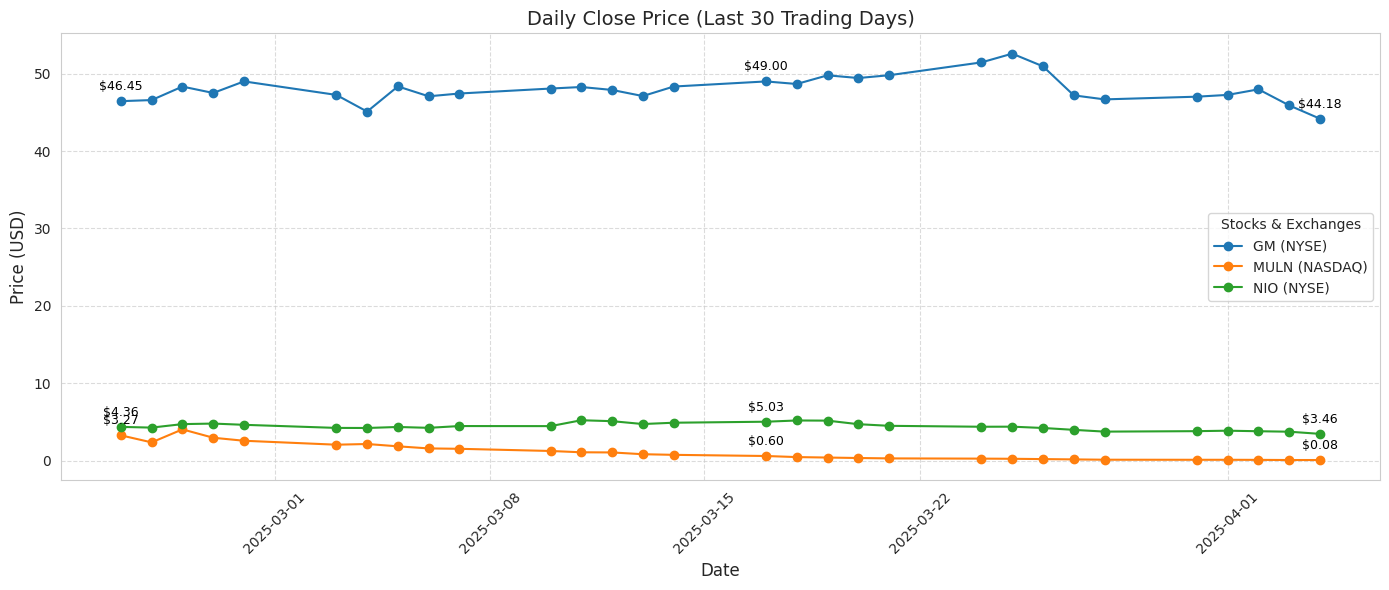

In [ ]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Section 4: Visualize daily closing price (time series plot)

# Set the figure size to make the plot clearer and easier to read
plt.figure(figsize=(14, 6))

# Loop through each stock symbol in our selected stocks
for symbol in stocks:
    # Filter the main DataFrame to get data specific to the current stock
    subset = all_data[all_data['Symbol'] == symbol]

    # Plot the closing price over the date range with markers for each data point
    plt.plot(subset['Date'], subset['Close'],
             label=f"{symbol} ({stocks[symbol]})",  # Include exchange in the label
             marker='o')  # Marker at each point

    # Identify indices for annotations: first, middle, and last data points
    indices = [0, len(subset) // 2, len(subset) - 1]

    # Loop over selected points and annotate with the closing price
    for i in indices:
        plt.annotate(
            f"${subset['Close'].iloc[i]:.2f}",  # Format the price with 2 decimal places and $ sign
            (subset['Date'].iloc[i], subset['Close'].iloc[i]),  # Position of the annotation
            textcoords="offset points",  # Offset the annotation text
            xytext=(0, 8),  # Move annotation 8 points above the point
            ha='center',  # Horizontally center the annotation
            fontsize=9,  # Set font size for readability
            color='black'  # Annotation text color
        )

# Add a descriptive title to the plot
plt.title('Daily Close Price (Last 30 Trading Days)', fontsize=14)

# Label the X-axis
plt.xlabel('Date', fontsize=12)

# Label the Y-axis
plt.ylabel('Price (USD)', fontsize=12)

# Add a legend to differentiate between stocks
plt.legend(title='Stocks & Exchanges')

# Rotate date labels on the X-axis for better readability
plt.xticks(rotation=45)

# Add grid lines for easier visual alignment
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to ensure nothing is cut off
plt.tight_layout()

# Display the plot
plt.show()


## **## Section 5a: *Project Repository (GitHub Link)***
Below is the link to our github repository

https://github.com/rak10095/Newsparsing-and-stock-analysis



## **Section 5b: *Retrieve 5-Year Historical Stock Data***

**Objective:**

*   Collect long-term historical data (5 years) for our selected automotive stocks (GM, NIO, MULN) to perform an in-depth performance analysis.

*   This extended period allows us to observe overall trends, performance cycles, and growth potential — as making stock recommendations based only on short-term (30 days) data would not provide reliable insights.

*   A 5-year view helps understand market behavior, volatility, and long-term returns, leading to a more data-driven and confident stock recommendation.

**Method:**

*   Using the Yahoo Finance API (yfinance library), we:
    *   Define our selected symbols: GM, NIO, and MULN.
    *   Fetch the daily historical data for the past 5 years.
    *   Save the retrieved data to a CSV file (5year_stock_data.csv) for further analysis and visualization.

**Outcome:**

*   Successfully collected and stored 5 years of historical stock data, which will help in making better long-term investment recommendations.

In [ ]:
import yfinance as yf

# Define stock symbols
symbols = ["GM", "NIO", "MULN"]

# Download 5 years of daily data
data = yf.download(symbols, period="5y")

# Save to CSV
data.to_csv('5year_stock_data.csv')
print("✅ Data saved to 5year_stock_data.csv")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed

✅ Data saved to 5year_stock_data.csv


**Section 5c: *Visualize 5-Year Historical Data and Recommend Stock***

**Objective:**

*   Perform a comprehensive long-term analysis (5 years) for our selected automotive stocks: GM, NIO, and MULN.

*   Visualize stock performance and identify the most profitable investment opportunity based on historical growth.

**Code Explanation:**

1.   Normalized Closing Price Chart (5 Years):

*   Compares stock growth over 5 years relative to their starting prices.
*   Highlights trends visually with annotations at the start, middle, and end points.

2.   5-Year Return Bar Chart:

*   Shows total return percentage for each stock over 5 years.
*   Provides a clear comparison of overall performance.

3.   Performance Summary & Recommendation:

*   Prints the exact return values for all stocks.
*   Based on highest return, GM (NYSE) is recommended as the best-performing stock.

**Recommendation:**
*   GM is recommended as the best-performing stock for investment.
Its strong and consistent growth over the past 5 years, as visualized in both the line and bar charts, makes it a reliable choice.

**Conclusion:**

*   Using this long-term view, we avoid the limitations of short-term trends (like 30-day analysis) and base our decision on a more reliable dataset.

*   Our analysis clearly indicates GM (NYSE) as the top performer among the selected automotive manufacturers.

*   The visualizations and return data together provide a confident, data-driven recommendation.






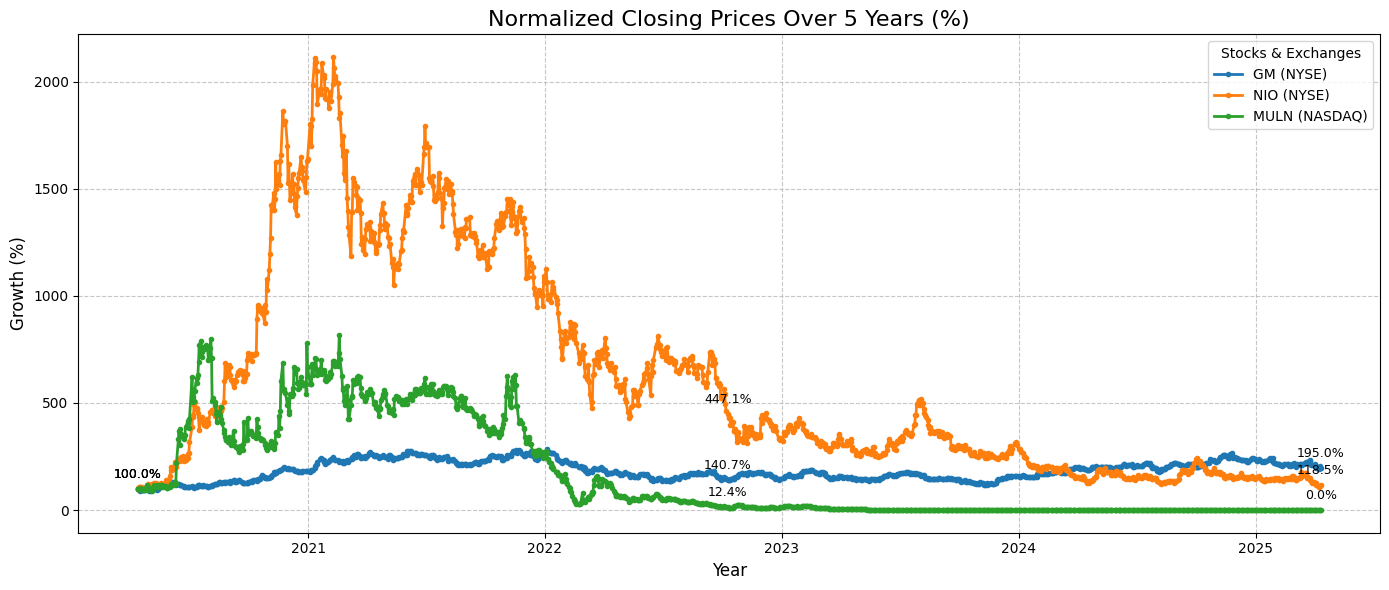

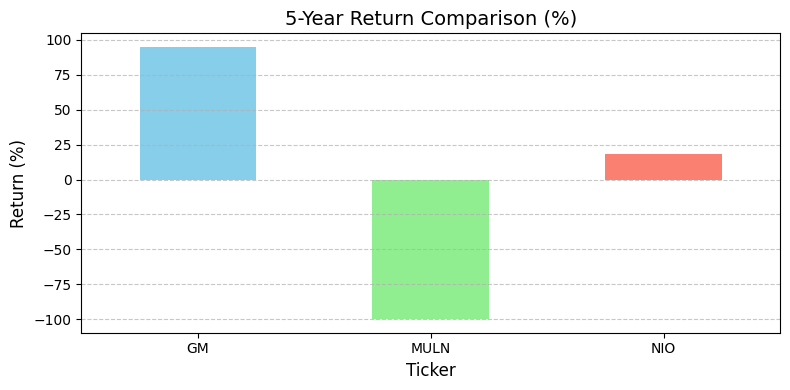

🔍 Performance over 5 years:
Ticker
GM      95.006071
MULN   -99.999999
NIO     18.518517
dtype: float64

✅ Recommendation: Based on the 5-year return, the best performing stock is: GM (NYSE)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv('5year_stock_data.csv', header=[0, 1], index_col=0)
data.index = pd.to_datetime(data.index)

# Prepare symbols and exchanges
symbols = ['GM', 'NIO', 'MULN']
exchange_info = {"GM": "NYSE", "NIO": "NYSE", "MULN": "NASDAQ"}

# =======================
# 1️⃣ Normalized Closing Price Chart
# =======================
plt.figure(figsize=(14, 6))

for symbol in symbols:
    df = data['Close'][symbol]
    normalized_price = (df / df.iloc[0]) * 100  # Normalize to starting point
    plt.plot(df.index, normalized_price, label=f"{symbol} ({exchange_info[symbol]})", linewidth=2, marker='o', markersize=3)

    # Add annotations for start, middle, end
    indices = [0, len(df) // 2, len(df) - 1]
    for idx in indices:
        price = normalized_price.iloc[idx]
        date = df.index[idx]
        plt.annotate(f"{price:.1f}%",
                     (date, price),
                     textcoords="offset points",
                     xytext=(0, 8),
                     ha='center',
                     fontsize=9,
                     color='black')

plt.title('Normalized Closing Prices Over 5 Years (%)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth (%)', fontsize=12)
plt.legend(title='Stocks & Exchanges')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# =======================
# 2️⃣ Performance Bar Chart
# =======================
returns = (data['Close'].iloc[-1] - data['Close'].iloc[0]) / data['Close'].iloc[0] * 100

plt.figure(figsize=(8, 4))
colors = ['skyblue', 'lightgreen', 'salmon']
returns.plot(kind='bar', color=colors)

plt.title('5-Year Return Comparison (%)', fontsize=14)
plt.xlabel('Ticker', fontsize=12)
plt.ylabel('Return (%)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# =======================
# 3️⃣ Print Performance and Recommendation
# =======================
print("🔍 Performance over 5 years:")
print(returns)

best_stock = returns.idxmax()
print(f"\n✅ Recommendation: Based on the 5-year return, the best performing stock is: {best_stock} ({exchange_info[best_stock]})")
